# Math 607 Applied Math I: Week 2 Homework

Due date: Thursday, Oct 14.

Please submit your solutions by upload on Canvas.

It's absolutely OK if you work together on these problems - and this is especially true for the programming problems, when encourage you to work in pairs at one computer, with one person typing and one person thinking.

We do want everyone to write up each assignment on their own.

## Problem 1: rooted trees

Let $T_n$ be the number of rooted trees of depth $n$
with the property that each node except the last has either $1$ or $m$ children.
Concretely, we can build these as follows:
begin with a single node at level 0 (the root),
and then form level $k+1$ by attaching either 1 or $m$ children to each node of level $k$.
Order does not matter, so
$T_0 = 1$ (by convention?);
$T_1 = 1$ (the root);
$T_2 = 2$ (the root could have either 1 or $m$ children);
and $T_3 = 2 + (m + 1)$
(either the root has one child, or the root has $m$ children,
and the number of these children that has $m$ children is between 0 and $m$).

1. Find a recursion for $T_n$ in terms of $T_{n-1}$.
2. Find an equation that the generating function for $T_n$ solves.
3. Check your answers by writing a method in python to generate all such trees.

#### Answer

Note that each tree at step $n$ can be generated from the trees in step $n-1$ in two ways:

1. Add a single root to the top of the $n-1$ trees.
2. Start with a m-root at the top and connect each node with one of the $n-1$ trees.

<img src="https://github.com/mufernando/math607/blob/main/hw/img/hw2_p1.jpeg?raw=true" width="200" />

This implies that:

$$T_n = T_{n-1} + T_{n-1}^m$$

I could not figure out how to solve the generating function for $T_n$.

In [1]:
import itertools

In [2]:
# works for n>=1, m>1
def generate_trees(n,m):
    if n == 1:
        return [""] 
    one_root = [f'({tree})' for tree in generate_trees(n-1, m)]
    m_root = [f'({",".join(t)})' for t in itertools.product(generate_trees(n-1,m), repeat=m)]
    return one_root + m_root

In [3]:
generate_trees(3,3)

['(())',
 '((,,))',
 '((),(),())',
 '((),(),(,,))',
 '((),(,,),())',
 '((),(,,),(,,))',
 '((,,),(),())',
 '((,,),(),(,,))',
 '((,,),(,,),())',
 '((,,),(,,),(,,))']

In [4]:
def num_trees(n,m):
    if n == 1:
        return 1
    x = num_trees(n-1,m)
    return x+(x**m)

Now, let's make sure our function that generates all possible trees at least gives us the right number of trees (based off of the recursion we got).

In [5]:
for m in range(2,5):
    for n in range(1,5):
        #print (n,m,len(generate_trees(n,m)), num_trees(n,m))
        assert (len(generate_trees(n,m))== num_trees(n,m))

## Problem 2: recursion and not

Consider the following badly written recursive program to compute the Fibonnacci numbers:
```
def f(n):
    if n <= 1:
        return n
    else:
        return f(n-1) + f(n-2)
```

**(a)** Analyze its run time.

**(b)** Write a iterative program to do the same thing, starting with f(0), etc.

In [6]:
import time
from matplotlib import pyplot as plt
import scipy.optimize
import numpy as np

In [7]:
def fib(n):
    if n <= 1:
        return n
    else:
        return fib(n-1) + fib(n-2)

Before we try and analyze `fib`s runtime, note that this algorithm is inefficient: in computing `fib(3)` we would call first `fib(2)` and `fib(1)`, but `fib(2)` would also call `fib(1)` independently. You can see this gets only worse at higher $n$s, and `fib` is called repeatedly for the same $n$.

To start building a notion of the complexity, let's first note that the time $T$ to compute `fib(n)` is:

$$T(n) = T(n-1) + T(n-2)$$
and
$$T(n-1) > T(n-2)$$

Thus,
$$T(n) < 2 T(n-1)$$
$$T(n-1) < 2 T(n-2)$$

so
$$ T(n) < 2^2 T(n-2)$$

Now, by induction you could repeat this and find that

$$T(n) < 2^i T(n-i)$$

which means $T(n) = O(2^n)$.

At each time we apply the recursion our upper bound on $T$ get's looser and looser, though. Let's try and empirically estimate $T$ by calling our timing the time to run our function for various $n$.

In [8]:
def timer(fun,*args):
    start = time.time()
    ret = fun(*args)
    end = time.time()
    return (ret, end-start)

In [9]:
times = [timer(fib,n)[1] for n in range(1,20)]
ns = list(range(1,20))

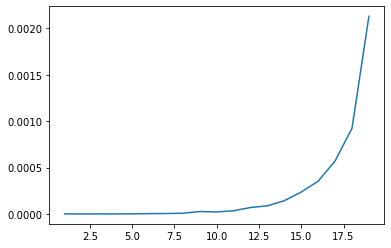

In [10]:
plt.plot(ns, times)

In [11]:
# fitting a curve of the form y = a*b^n (log transformed bc of floating point imprecision)
fit, cov = scipy.optimize.curve_fit(lambda n, a, b: a + n * b,  ns,  np.log(times))

In [12]:
np.exp(fit)

array([3.0908944e-07, 1.5572918e+00])

This implies the time to compute $\text{fib}(n)$ is closer to $O(1.6^n)$

Below, I write `fibb`, an alternative implementation to compute Fibonacci numbers that works iteratively (and note it also always remembers the last two elements of the sequence, to avoid having to re-compute it every time.

In [13]:
def fibb(n):
    n1 = 1
    n2 = 1
    if n == 0:
        fi = 0
    else:
        fi = n2
    for i in range(2,n):
        fi = n1 + n2
        n1,n2 = fi, n1
    return fi

In [14]:
# checking it produces the same output as fib
for i in range(0, 20):
    assert fib(i) == fibb(i)

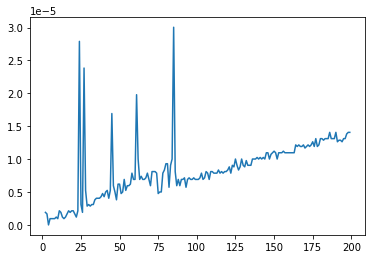

In [15]:
times = [timer(fibb,n)[1] for n in range(2,200)]
ns = list(range(2,200))
plt.plot(ns, times)

In [16]:
fit2, cov2 = scipy.optimize.curve_fit(lambda n, a, b: a + n * b,  ns,  times)
fit2

array([2.97043846e-06, 5.26719883e-08])

This implies the time to compute `fib(n)` is just $O(n)$, so it is way faster than `fib`!!

## Problem 3: Recursive mountains

Recall that with $C_n$ the number of "mountain ranges" of length $2n$
we found the recursive formula
$$ C_n = \sum_{j=0}^{n-1} C_j C_{n-j-1} $$
by decomposing a mountain range into the first mountain (of length $2(j+1)$) and everything else.
Write a iterative function that generates all mountain ranges of length $2n$
using this same decomposition,
and compare the results to the recursive method we wrote in office hours (see the website for the notebook).

In [17]:
import itertools

In [18]:
# recursive from office hours
def mountainsr(n):
    if n == 0:
        yield ""
    else:
        for j in range(n):
            for left in mountainsr(j):
                for right in mountainsr(n-j-1):
                    # add "(" and ")" around left to make it a "single mountain",
                    # not a mountain range
                    yield "(" + left + ")" + right


In [19]:
# two conditions for a valid mountain range:
# 1. as you iterate over characters in a m.r., the number of ) may never exceed the number of )
# 2. at the end, you need to have same number of ( and )
def is_valid(m):
    left_excess = 0
    for c in m:
        if c == '(':
            left_excess += 1
        else:
            left_excess -= 1
        if left_excess < 0:
            return False
    return left_excess == 0

In [20]:
# iterative function
def mountainsi(n):
    mts = []
    for m in itertools.product(["(",")"], repeat=2*n):
        if is_valid(m):
            mts.append("".join(m))
    return mts

In [21]:
for n in range(10):
    assert set(mountainsi(n)) == set(mountainsr(n))

In [22]:
r=range(0,10)
ns = list(r)
tsr = [timer(mountainsr,n)[1] for n in r]
tsi = [timer(mountainsi,n)[1] for n in r]

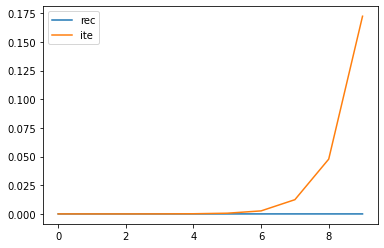

In [23]:
plt.plot(ns, tsr, label="rec")
plt.plot(ns, tsi, label="ite")
plt.legend()

Using the closed form solution to the Catalan Numbers, we get that a upper bound on it would be (see wikipedia [here](https://en.wikipedia.org/wiki/Catalan_number)).

$$C_n \approx \frac{4^n}{n^{\frac{3}{2}}\sqrt{\pi}}$$

So $O(C_n) = 4^n$.

The iterative solution is much slower, however. We have to first generate all the possible strings with $2n$ '(' and ')'s. This would cost $2^{2n}$. But for each string, we need to validate it by iterating over the entire string, which would cost $2n$. Thus, the time to generate all mountain ranges of size $2n$ using the iterative function would be $O(n2^{2n})$.

## Problem 4: outbreak size

Consider an outbreak of a disease with $R_0 \le 1$:
suppose the mean number of new cases per case is $\xi$ with $\mathbb{E}[\xi] = R_0 \le 1$.
We'd like to learn about the *total* number of cases in the outbreak:
suppose $(N_t)_{t \ge 0}$ is the branching process driven by $\xi$
and let $W_t = N_0 + N_1 + \cdots + N_t$,
and $W = \lim_t W_t$. 
Suppose the outbreak has $N_0 = 1$,
and to agree with previous notation let $\mu = R_0$.

**(a)** Find $\mathbb{E}[W]$.

**(b)** Let $G_t(u) = \mathbb{E}[u^{W_t}]$, and $\phi(u) = \mathbb{E}[u^\xi]$,
    and show that $G_{t+1}(u) = u \phi(G_t(u))$,
    and so $G(u) =  \mathbb{E}[u^{W}] = u \phi(G(u))$.
    *(Hint: split it into the families of the first set of children.)*
    
**(c)** Find the variance of $W$ in terms of $mu$ and $V = \mathbb{E}[\xi^2]$.

**(d)** Write a function that simulates from the branching process
in the case where $\xi \sim \text{Poisson}(\lambda)$,
and use it to check your answers to (a) and (c) at a few values of $\mu < 1$.

**(e)**
What happens when you use your simulation to try to estimate the mean of $W$ at $\mu = 1$?
Plot the mean of $n$ independent trials against $n$ at $\mu=0.95$ and at $\mu=1$.

### Answer

#### d) and e)

In [24]:
import numpy as np

In [25]:
def sim_bp(t, mu):
    last_n = 1
    tot = last_n
    for i in range(1,t+1):
        # sum of poisson R.V.s is poisson with lambda = sum of lambdas
        new_n = np.random.poisson(mu*last_n, 1)[0]
        tot += new_n
        last_n = new_n
    return(tot)

How does the closed form theoretical solution to $\mathbb{E}(W)$ compare to an empirical average of the $W$s?

In [26]:
print("\tTheory\tEmpirical")
for mu in [0.01,0.5,0.95]:
    ws = [sim_bp(10000, mu) for _ in range(100)]
    the_expw = 1/(1-mu)
    obs_expw = np.mean(ws)
    print(f"mu={mu}\t{the_expw:.3f}\t{obs_expw:.3f}")

	Theory	Empirical
mu=0.01	1.010	1.010
mu=0.5	2.000	2.100
mu=0.95	20.000	21.600


In [27]:
ns = [20,80,320,4*320,4*4*320]
means_95 = [np.mean([sim_bp(10000, 0.95) for _ in range(n)]) for n in ns]

In [28]:
means_100 = [np.mean([sim_bp(10000, 1) for _ in range(n)]) for n in ns]

The $\mathbb{E}[W]$ converges quickly in the case of $\mu=0.95$, but doesn't seem to converge for $\mu=1$.

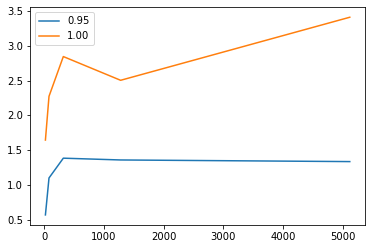

In [31]:
plt.plot(ns, np.log10(means_95), label="0.95")
plt.plot(ns, np.log10(means_100), label="1.00")
plt.legend()

#### a) and b)

<img src="https://github.com/mufernando/math607/blob/main/hw/img/hw2_p4a.jpeg?raw=true" width="600" />

<img src="https://github.com/mufernando/math607/blob/main/hw/img/hw2_p4b.jpeg?raw=true" width="600" />
